Предполагается, что в рамках данного задания ученики сами будут изучать документацию, как минимум используя функционал `tab` и `shift+tab` от Jupyter

1. Импортируйте библиотеку pandas 
2. Считайте файл `wage.csv` в DataFrame с названием `wage`. Используйте для этого функцию pd.read_csv()

`person_id` - идентификатор человека

`gender` - пол, 0 - женский, 1 - мужской

`wage` - заработная плата в рублях

In [3]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('www.kaggle.com/datasets/d0rj3228/russian-literature/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

ModuleNotFoundError: No module named 'mlcroissant'

3. Поменяйте колонку `gender` так, чтобы были записи `F` (female) и `M` (male) вместо 0 и 1

In [14]:
wage['gender'] = wage['gender'].replace( [0, 1], ['F', 'M'])

4. Давайте посчитаем среднюю зарплату у мужчин и женщин. Для этого используйте метод `groupby` со следующим синтаксисом:

`dataframe.groupby(Название_колонки_для_группировки)[Перечисление_колонок_для_агрегации].функция_агрегации()`

In [16]:
wage.groupby('gender')['wage'].mean()

gender
F    40855.747261
M    46815.944005
Name: wage, dtype: float64

5. Теперь взглянем внимательнее на данные и обнаружим, что некоторые люди попали в выборку несколько раз. 
    1. Найдите таких людей. Подсказка: `value_counts()`
    0. Убедитесь, что записи по ним с одинаковым `wage`. Возможно, тут вам пригодится функция агрегации `nunique()`, отображающая количество разных значений
    0. Избавьтесь от повторяющихся значений. Подсказка: `drop_duplicates()`

In [53]:
wage.groupby('person_id')['wage'].size()

person_id
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: wage, Length: 1000, dtype: int64

In [43]:
wage['person_id'].value_counts()

person_id
17     2
16     2
15     2
14     2
13     2
      ..
342    1
343    1
344    1
345    1
999    1
Name: count, Length: 1000, dtype: int64

In [44]:
wage['person_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1006 entries, 0 to 1005
Series name: person_id
Non-Null Count  Dtype
--------------  -----
1006 non-null   int64
dtypes: int64(1)
memory usage: 8.0 KB


In [54]:
wage['person_id'] = wage['person_id'].drop_duplicates()

In [40]:
wage['person_id'].nunique()

1000

In [25]:
wage['person_id'].value_counts()
wage.person_id[wage['person_id'].value_counts()>1]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

6. Теперь посмотрим внимательнее на зарплаты
    1. Охарактеризуйте имеющиеся данные по зарплатам. Подсказка: `describe`
    1. Избавьтесь от бессмысленных значений

In [68]:
wage['wage'].describe()

count      1001.000000
mean      44475.393630
std       54645.693539
min         945.648458
25%       14688.987067
50%       27519.361794
75%       52492.154408
max      755320.874132
Name: wage, dtype: float64

7. Давайте теперь посмотрим на зарплату с учетом бонуса. Для этого нам понадобится таблица `bonus.csv`. Считайте ее в переменную `bonus`. Заметьте, что она сохранена немного в другом формате, и вам понадобится уточнить параметр `sep` - разделитель записей. Сравните текущий файл с предыдущим и попробуйте решить проблему

In [104]:
bonus['a']=bonus['bonus'].astype(int)
bonus['a'][0]

85059

In [101]:
bonus = pd.read_csv('C:/Users/User/bonus.csv', sep=';')
bonus['bonus'].describe()

count    4.500000e+02
mean     1.855132e+05
std      5.422218e+05
min      1.236019e+02
25%      7.438046e+03
50%      3.313548e+04
75%      1.236061e+05
max      6.329445e+06
Name: bonus, dtype: float64

In [74]:
wage['person_id'].describe()

count    995.000000
mean     501.844221
std      287.638377
min        0.000000
25%      253.500000
50%      502.000000
75%      750.500000
max      999.000000
Name: person_id, dtype: float64

In [66]:
wage = wage.drop([29, 34, 39, 44, 49])

8. Чтобы посчитать итоговую зарплату, нам нужно по каждому человеку знать и оклад, и премию. Для этого надо будет соединить (сджойнить) таблицы по `person_id`. Используйте для этого функцию `pd.merge`. Помните, что параметр `how` должен быть `'outer'`, чтобы сохранить те записи, что есть только в одной таблице. Результат запишите в новый dataframe `df`

In [105]:
df = pd.merge(wage, bonus, 'outer')
df

,person_id,gender,wage,bonus,a
0,0.0,1.0,46793.603811,3.332934e+04,33329.0
1,1.0,1.0,33481.575720,NaN,NaN
2,2.0,1.0,44523.699084,3.192912e+06,3192912.0
3,3.0,1.0,15995.576829,2.196858e+04,21968.0
4,4.0,0.0,10282.631224,NaN,NaN
...,...,...,...,...,...
1000,997.0,0.0,104504.616392,5.380978e+04,53809.0
1001,998.0,1.0,98927.903076,NaN,NaN
1002,999.0,1.0,108107.141368,NaN,NaN
1003,43.0,NaN,NaN,2.687784e+05,268778.0


9. Наконец, давайте посчитаем итоговую зарплату
    1. Замените отсутствующие записи в колонке `bonus` нулями
    1. Уберите людей без `wage` - это те "плохие" записи, от которых мы избавлялись на предыдущих шагах
    1. Сделайте новую колонку `total`, которая будет равна 12 окладам и премии
    1. Посчитайте среднюю и медианную итоговую зарплату в разрезе по полу. Подсказка: вместо функции агрегации можно написать `.agg()` и перечислить внутри нужные агрегаты

In [129]:
df['bonus'] =df['bonus'].fillna(0)
df['a'] = df['a'].fillna(0)
df['total']=12*df['wage']+df['bonus']
df['t']=df['total'].astype(int)


In [136]:
df[df['gender']==1]

,person_id,gender,wage,bonus,a,total,t
0,0.0,1.0,46793.603811,3.332934e+04,33329.0,5.948526e+05,594852
1,1.0,1.0,33481.575720,0.000000e+00,0.0,4.017789e+05,401778
2,2.0,1.0,44523.699084,3.192912e+06,3192912.0,3.727197e+06,3727196
3,3.0,1.0,15995.576829,2.196858e+04,21968.0,2.139155e+05,213915
5,5.0,1.0,65464.532281,5.316780e+04,53167.0,8.387422e+05,838742
...,...,...,...,...,...,...,...
996,993.0,1.0,29934.652553,0.000000e+00,0.0,3.592158e+05,359215
998,995.0,1.0,66503.737185,3.452137e+03,3452.0,8.014970e+05,801496
999,996.0,1.0,9972.956272,3.892790e+05,389278.0,5.089544e+05,508954
1001,998.0,1.0,98927.903076,0.000000e+00,0.0,1.187135e+06,1187134


In [137]:
df[df['gender']==1].agg(['mean', 'median'])

,person_id,gender,wage,bonus,a,total,t
mean,508.158416,1.0,47081.694269,92162.159056,92161.932673,657142.490282,657141.990099
median,509.000000,1.0,29006.633828,0.000000,0.000000,437499.824868,437499.000000


In [138]:
df[df['gender']==0].agg(['mean', 'median'])

,person_id,gender,wage,bonus,a,total,t
mean,493.376016,0.0,41353.986687,74498.299183,74498.071138,570746.139432,570745.650407
median,494.000000,0.0,26721.001610,0.000000,0.000000,347622.913892,347622.000000


10. Сохраните `df` в файл, используя метод `to_csv()`. Не записывайте индексы

In [16]:
import pandas as pd
a[a['SeniorCitizen']==1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [14]:
a = pd.read_csv('C:/Users/User/wa.csv', sep=',')
a.groupby(['SeniorCitizen', 'Churn']).describe()

tenure                                               \
                      count       mean        std  min   25%   50%   75%   
SeniorCitizen Churn                                                        
0             No     4508.0  36.906610  24.173765  0.0  14.0  37.0  60.0   
              Yes    1393.0  16.935391  19.338191  1.0   2.0   9.0  25.0   
1             No      666.0  42.060060  23.228049  1.0  22.0  45.0  64.0   
              Yes     476.0  21.033613  19.791410  1.0   3.0  15.0  35.0   

                          MonthlyCharges                               \
                      max          count       mean        std    min   
SeniorCitizen Churn                                                     
0             No     72.0         4508.0  58.618123  30.965375  18.25   
              Yes    72.0         1393.0  72.298098  25.452247  18.85   
1             No     72.0          666.0  79.182057  25.548785  18.95   
              Yes    72.0          476.0  80.713445  21.007886  19.45   

                                                       
                         25%     50%      75%     max  
SeniorCitizen Churn                                    
0             No     24.4000  59.750  84.9000  118.75  
              Yes    53.8500  78.100  91.8500  118.35  
1             No     65.2125  84.850  99.1750  117.35  
              Yes    73.6250  84.825  95.7125  117.45

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [9]:
dat

,Номер,Дата создания,Дата оплаты,Title,Статус,Заработано,Город,Платежная система
0,1062823,01.12.2019 10:50,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.50,Чита,Сбербанк эквайринг
1,1062855,01.12.2019 20:53,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.30,Краснодар,Яндекс.Касса
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.00,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.00,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.00,г.Москва и Московская область,NaN
...,...,...,...,...,...,...,...,...
287,1064720,30.12.2019 9:42,30.12.2019 12:49,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Завершен,2935.44,Самарская область,Яндекс.Касса
288,1064724,30.12.2019 11:32,NaN,Курс обучения «Консультант»,Отменен,0.00,NaN,NaN
289,1064775,31.12.2019 2:17,31.12.2019 2:22,Курс обучения «Консультант»,Завершен,7423.92,NaN,"Сбербанк эквайринг,Бонусный счет"
290,1064793,31.12.2019 16:40,01.01.2020 14:29,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Завершен,2935.44,Республика Карелия,Яндекс.Касса


In [38]:
import pandas as pd
dat = pd.read_csv(r'C:\Users\User\Downloads\lesson_1_data.csv', encoding='Windows-1251', sep=';')
dat.groupby(['Title', 'Статус'], as_index = False).agg({'Заработано':'sum'})

,Title,Статус,Заработано
0,Курс обучения «Консультант»,Завершен,208163.49
1,Курс обучения «Консультант»,Отменен,0.00
2,Курс обучения «Специалист»,Завершен,160862.64
3,Курс обучения «Специалист»,Отменен,0.00
4,Курс обучения «Эксперт»,Завершен,148992.80
5,Курс обучения «Эксперт»,Отменен,0.00
6,Курс от Школы Диетологов. Бизнес,Завершен,18752.54
7,Курс от Школы Диетологов. Бизнес,Отменен,0.00
8,Курс от Школы Диетологов. Бизнес,Частично оплачен,0.00
9,Курс от Школы Диетологов. Повышение квалификац...,Завершен,88384.92


In [34]:
dat.query('Заработано<1000')

,Номер,Дата создания,Дата оплаты,Title,Статус,Заработано,Город,Платежная система
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN
5,1062900,03.12.2019 21:49,NaN,Курс обучения «Консультант»,Отменен,0.0,Краснодарский край,NaN
6,1062911,04.12.2019 13:12,NaN,Курс обучения «Консультант»,Отменен,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
276,1064623,28.12.2019 15:47,NaN,Курс от Школы Диетологов. Бизнес,Отменен,0.0,Воронежская область,NaN
281,1064679,29.12.2019 12:26,NaN,Курс от Школы Диетологов. Бизнес,Частично оплачен,0.0,Кемеровская область,Бонусный счет
283,1064686,29.12.2019 15:52,NaN,Курс от Школы Диетологов. Повышение квалификац...,Частично оплачен,0.0,Чеченская Республика,Бонусный счет
285,1064692,29.12.2019 17:13,NaN,Курс обучения «Консультант»,Отменен,0.0,Свердловская область,NaN


In [40]:
dat['Номер'].value_counts(bins=4)

(1063316.25, 1063809.5]      173
(1062821.026, 1063316.25]     46
(1064302.75, 1064796.0]       45
(1063809.5, 1064302.75]       28
Name: count, dtype: int64

In [45]:
dat.query('Статус == \'Отменен\'')

,Номер,Дата создания,Дата оплаты,Title,Статус,Заработано,Город,Платежная система
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN
5,1062900,03.12.2019 21:49,NaN,Курс обучения «Консультант»,Отменен,0.0,Краснодарский край,NaN
6,1062911,04.12.2019 13:12,NaN,Курс обучения «Консультант»,Отменен,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
269,1064526,27.12.2019 14:20,NaN,Курс от Школы Диетологов. Бизнес,Отменен,0.0,Крым Советский,NaN
271,1064576,27.12.2019 21:58,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN
276,1064623,28.12.2019 15:47,NaN,Курс от Школы Диетологов. Бизнес,Отменен,0.0,Воронежская область,NaN
285,1064692,29.12.2019 17:13,NaN,Курс обучения «Консультант»,Отменен,0.0,Свердловская область,NaN


In [33]:
import pandas as pd
data = pd.read_csv(r'C:\Users\User\Downloads\2_taxi_nyc.csv')
data.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [49]:
data

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [54]:
a = [data['pickups'].nunique(), data.borough.nunique()]
pd.Series([data['pickups'].nunique(), data.borough.nunique()])

0    3406
1       6
dtype: int64

In [2]:
data.pickups.sum()

14265773

In [3]:
data.groupby('borough').agg({'pickups':'sum'})

,pickups
borough,
Bronx,220047
Brooklyn,2321035
EWR,105
Manhattan,10367841
Queens,1343528
Staten Island,6957


In [4]:
data.pickups.idxmax()

28604

In [5]:
data.borough.iloc[28603]

'EWR'

In [6]:
data.groupby('borough').agg({'pickups':'sum'}).idxmin()

pickups    EWR
dtype: object

In [7]:
data.borough.iloc[data.pickups.idxmin() - 1]

'Brooklyn'

In [8]:
data.groupby('borough').agg('sum', 'pickups')

,pickups,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
borough,,,,,,,,,,
Bronx,220047,26058.169048,38305.375714,206244.747619,133132.207143,4420361.0,16.594,113.238,395.368,11016.0
Brooklyn,2321035,26058.169048,38305.375714,206244.747619,133132.207143,4420361.0,16.594,113.238,395.368,11016.0
EWR,105,26058.169048,38305.375714,206244.747619,133132.207143,4420361.0,16.594,113.238,395.368,11016.0
Manhattan,10367841,26058.169048,38305.375714,206244.747619,133132.207143,4420361.0,16.594,113.238,395.368,11016.0
Queens,1343528,26058.169048,38305.375714,206244.747619,133132.207143,4420361.0,16.594,113.238,395.368,11016.0
Staten Island,6957,26058.169048,38305.375714,206244.747619,133132.207143,4420361.0,16.594,113.238,395.368,11016.0


In [9]:
data.groupby('borough').sum('pickups').pickups.idxmin()

'EWR'

In [10]:
data.groupby(['borough', 'hday']).agg('mean', 'pickups')

pickups       spd       vsb       temp       dewp  \
borough       hday                                                          
Bronx         N       50.771073  6.004750  8.809249  47.598782  30.687809   
              Y       48.065868  5.882236  9.089531  44.743912  29.819860   
Brooklyn      N      534.727969  6.004750  8.809249  47.598782  30.687809   
              Y      527.011976  5.882236  9.089531  44.743912  29.819860   
EWR           N        0.023467  6.004750  8.809249  47.598782  30.687809   
              Y        0.041916  5.882236  9.089531  44.743912  29.819860   
Manhattan     N     2401.302921  6.004750  8.809249  47.598782  30.687809   
              Y     2035.928144  5.882236  9.089531  44.743912  29.819860   
Queens        N      308.899904  6.004750  8.809249  47.598782  30.687809   
              Y      320.730539  5.882236  9.089531  44.743912  29.819860   
Staten Island N        1.606082  6.004750  8.809249  47.598782  30.687809   
              Y        1.497006  5.882236  9.089531  44.743912  29.819860   

                            slp    pcp 01    pcp 06    pcp 24        sd  
borough       hday                                                       
Bronx         N     1017.798587  0.003929  0.024589  0.085073  2.542325  
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719  
Brooklyn      N     1017.798587  0.003929  0.024589  0.085073  2.542325  
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719  
EWR           N     1017.798587  0.003929  0.024589  0.085073  2.542325  
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719  
Manhattan     N     1017.798587  0.003929  0.024589  0.085073  2.542325  
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719  
Queens        N     1017.798587  0.003929  0.024589  0.085073  2.542325  
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719  
Staten Island N     1017.798587  0.003929  0.024589  0.085073  2.542325  
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719

In [11]:
data.groupby(['pickup_month', 'borough']).agg('sum', 'pickups').sort_values('pickups',ascending = False)

,,pickups,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
pickup_month,borough,,,,,,,,,,
Jun,Manhattan,1995388,3455.230952,6142.395714,50833.997619,41397.678571,730710.1,4.355833,29.579,89.142000,0.0
May,Manhattan,1888800,3147.269048,6685.430714,50034.590476,36944.566667,758887.8,0.999167,2.215,8.100000,0.0
Feb,Manhattan,1718571,4866.690476,5963.214524,16324.138095,5792.009524,683973.1,1.515000,11.130,41.111667,6122.0
Mar,Manhattan,1661261,4514.116667,6315.956667,28152.816667,14869.350000,758456.2,3.884500,27.187,88.778000,3912.5
Apr,Manhattan,1648278,4707.666667,6722.813333,38545.500000,23615.666667,730959.2,1.807167,13.763,61.592000,0.0
Jan,Manhattan,1455543,5367.195238,6475.564762,22353.704762,10512.935714,757374.6,4.032333,29.364,106.644333,981.5
Jun,Brooklyn,482466,3455.230952,6142.395714,50833.997619,41397.678571,730710.1,4.355833,29.579,89.142000,0.0
May,Brooklyn,476087,3147.269048,6685.430714,50034.590476,36944.566667,758887.8,0.999167,2.215,8.100000,0.0
Apr,Brooklyn,378095,4707.666667,6722.813333,38545.500000,23615.666667,730959.2,1.807167,13.763,61.592000,0.0


In [12]:
new_data = pd.DataFrame(data.groupby(['pickup_month', 'borough']).agg({'pickups':'sum'}).sort_values('pickups',ascending = False))

In [13]:
new_data.shape

(36, 1)

In [16]:
data.borough.unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [23]:
%matplotlib inline

<Axes: >

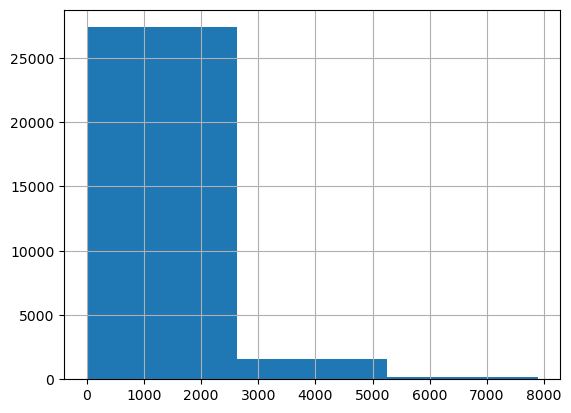

In [27]:
data.pickups.hist(bins = 3)

<Axes: >

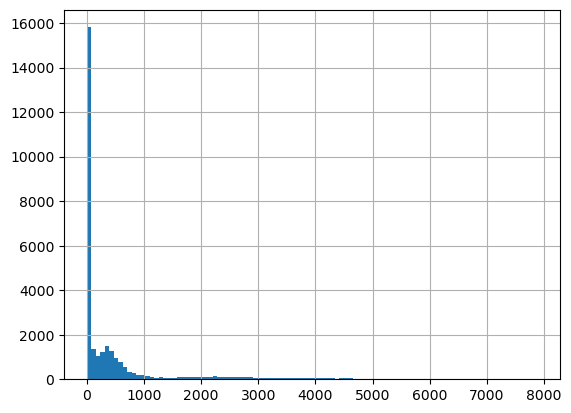

In [30]:
data.pickups.hist(bins = 100)

In [31]:
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_16340\3927843364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.pickups)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pickups', ylabel='Density'>

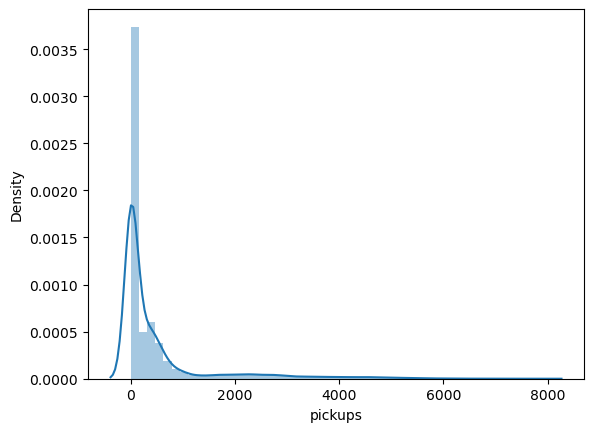

In [32]:
sns.distplot(data.pickups)

In [2]:
xs = [i + 3 for i in range(10)]
xs

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [4]:
a = [i*2 for i in range(5)]
a

[0, 2, 4, 6, 8]

In [5]:
import pandas as pd

In [10]:
a = pd.DataFrame({'a': ['a', 'a', 'b'], 'b': [5, 6, 7]})
a

,a,b
0,a,5
1,a,6
2,b,7


In [2]:
a= ['a', 'a']
a.count('a')

2